In [50]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import numpy as np
from floquet_simulations.plot_functions import PlotParams
import scipy.integrate as integrate
from numpy import pi, sin, cos
from scipy.special import jv
figsize_hams=(4.3,4.3)
fontsize = 10
PlotParams(fontsize=fontsize, serif_font="cm")
cm_unit = 1/2.54
save_dir = Path().absolute().parent.parent.parent/"figures"/"local_mod_paper"

def ConvertToFloat(frac_str):
    try:
        return float(frac_str)
    except ValueError:
        try:
            num, denom = frac_str.split('/')
        except ValueError:
            return None
        try:
            leading, num = num.split(' ')
        except ValueError:
            return float(num) / float(denom)        
        if float(leading) < 0:
            sign_mult = -1
        else:
            sign_mult = 1
        return float(leading) + sign_mult * (float(num) / float(denom))
    
def f_J12(A2, A3, omega0, phi3):
    
    alpha = 1
    
    omega2 = alpha*omega0

    J12 = jv(0,A2/omega2)


    return np.abs(J12)



def f_J23(A2, A3, omega0, phi3):
    
    alpha = 1
    beta = 2
    
    omega2 = alpha*omega0
    omega3 = beta*omega0

    # first term expansion term
    J23_real = omega0/2/pi*integrate.quad(lambda t: cos(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    J23_imag = 1j*omega0/2/pi*integrate.quad(lambda t: sin(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    # we are removing esimate of absolute error
    J23 = J23_real + J23_imag


    return np.abs(J23)

    
def f_J31(A2, A3, omega0, phi3):
    

    beta = 2

    omega3 = beta*omega0


    J31 = jv(0, A3/omega3)


    return np.abs(J31)

In [2]:
omega0 = 8
alpha=1; beta=2
# data_dir = Path().absolute().parent.parent.parent/"paper_data"/"numerical_optimisation"/"continuous_neighbourhood_grad_descent_findminimum_initial_conds.csv"
# data_dir = Path().absolute().parent.parent.parent/"paper_data"/f"grad_descent_findminimum_truevals.csv"
data_dir = Path().absolute().parent.parent.parent/"paper_data"/"numerical_optimisation"/"smooth_optimisation_data_(x,y)=(.5,.3).csv"

In [3]:
df = pd.read_csv(data_dir,
                  index_col=False,
                   converters={"xi0_frac": ConvertToFloat
                   }
                  )

In [8]:
r10 = 0.5
r20 = 0.3

dfP = df[(df.xi0_frac <=1)
        &(df.r10 == r10)
        &(df.r20 == r20)
        &(df.algo ==
        #    "FindMinimum,PG=3,AG=3,MI=inf,imported_ic_smart4.0")
           "FindMinimum,PG=5,AG=5,MI=inf,w=8,use_last_ic")
          # "FindMinimum,PG=5,AG=5,MI=inf,w=8,use_last_ic,3")

        ]

dfP = dfP.sort_values(by="xi0_frac")
dfP.xi0_frac = np.round(dfP.xi0_frac.to_list(), 3)


In [11]:
dfP.to_csv(Path().absolute().parent.parent.parent/"paper_data"/"numerical_optimisation"/"smooth_optimisation_data_(x,y)=(.9,.9).csv", index=False)

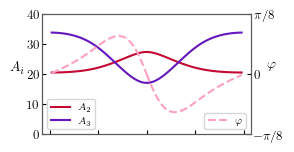

In [77]:
figsize = (6.9/2.56, 4/2.56)

fig, ax1 = plt.subplots(figsize=figsize)

ax1.plot(dfP.xi0_frac, dfP.A2, '-', c="#C30934", label=r"$A_2$", ms = 1)
ax1.plot(dfP.xi0_frac, dfP.A3, '-', c="#6517BC", label=r"$A_3$", ms = 1)
ax1.set_yticks([ 0,10, 20, 30,40])
ax1.set_xticks(np.linspace(-1,1,5))
ax1.set_xticklabels([r"", r"", r"", r"", r""])

# ax1.set_xlabel(r"$\Phi^t$")
# ax1.xaxis.set_label_coords(0.5,-0.14)

ax1.tick_params(axis="y", left=True, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  

ax1.set_ylabel(r"$A_i$", rotation=0)
ax1.yaxis.set_label_coords(-0.12, 0.5)

ax2 = ax1.twinx()
ax2.plot(dfP[dfP.xi0_frac <=0].xi0_frac, dfP[dfP.xi0_frac <=0].phi, '--', c="#FFA0C0", label=r"$\varphi$", ms = 1)
ax2.plot(dfP[dfP.xi0_frac >=0].xi0_frac, dfP[dfP.xi0_frac >=0].phi, '--', c="#FFA0C0", ms = 1)
ax2.set_yticks([-pi/8, 0, pi/8])
ax2.set_yticklabels([r"$-\pi/8$", r"$0$", r"$\pi/8$"])
ax2.set_ylabel(r"$\varphi$", rotation=0)
ax2.yaxis.set_label_coords(1.1,0.63)
ax2.tick_params(axis="y", left=False, right=True, labelleft=False, 
        labelright=True, direction = "in", length = 3, pad=2)  

leg = ax1.legend(loc='lower left', bbox_to_anchor=(0, 0))
leg2 = ax2.legend(loc='lower right', bbox_to_anchor=(1, 0))
fig.savefig(save_dir/"flux_drive_params_findmin_nh=(0.5,0.3).pdf", format="pdf", bbox_inches="tight", pad_inches=0)

plt.show()

In [58]:
dfP["absJ12"] = dfP.apply(lambda row : f_J12(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)

dfP["absJ23"] = dfP.apply(lambda row : f_J23(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)

dfP["absJ31"] = dfP.apply(lambda row : f_J31(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)

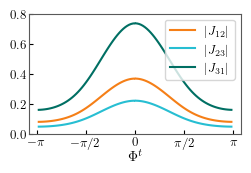

In [76]:
figsize = (7/2.56, 4/2.56)
marker = "-"
fig, ax = plt.subplots(figsize=figsize)


ax.plot(dfP.xi0_frac, dfP.absJ12, marker, c="#F57F17", label=r"$|J_{12}|$")
ax.plot(dfP.xi0_frac, dfP.absJ23, marker, c="#27BED2", label=r"$|J_{23}|$")
ax.plot(dfP.xi0_frac, dfP.absJ31, marker, c="#006F63", label=r"$|J_{31}|$")
ax.set_xticks(np.linspace(-1,1,5))
ax.set_xticklabels([ r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
ax.xaxis.set_label_coords(0.5,-0.14)

ax.tick_params(axis="y", left=True, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2) 

ax.set_xlabel(r"$\Phi^t$")
ax.set_yticks(np.linspace(0, 0.8, 5))
# ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
leg = ax.legend(loc='upper right', bbox_to_anchor=(1,1), fontsize=fontsize*0.9)

fig.savefig(save_dir/"flux_J_params_findmin_nh=(0.5,0.3).pdf", format="pdf", bbox_inches="tight", pad_inches=0)

plt.show()

In [70]:
import scipy.integrate as integrate
from numpy import sin, cos
from scipy.special import jv

def Mid(v1, v2, v3):
   return v1+v2+v3 - np.max([v1, v2, v3])-np.min([v1, v2, v3])

def f_xi(A2, A3, omega0, phi3):
    
    alpha = 1
    beta = 2
    
    omega2 = alpha*omega0
    omega3 = beta*omega0

    # first term expansion term
    J23_real = omega0/2/pi*integrate.quad(lambda t: cos(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    J23_imag = 1j*omega0/2/pi*integrate.quad(lambda t: sin(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    # we are removing esimate of absolute error
    J23 = J23_real + J23_imag


    J31 = jv(0, A3/omega3)
    J12 = jv(0,A2/omega2)

    xi = np.angle(J12*J31*J23)

    # r1 = Mid(np.abs(J31), np.abs(J23), np.abs(J12)) / np.max([np.abs(J31), np.abs(J23), np.abs(J12)])
    # r2 = np.min([np.abs(J12), np.abs(J23), np.abs(J31)]) / np.max([np.abs(J12), np.abs(J23), np.abs(J31)])

    # return r1, r2, xi

    return xi

def f_r1(A2, A3, omega0, phi3):
    
    alpha = 1
    beta = 2
    
    omega2 = alpha*omega0
    omega3 = beta*omega0

    # first term expansion term
    J23_real = omega0/2/pi*integrate.quad(lambda t: cos(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    J23_imag = 1j*omega0/2/pi*integrate.quad(lambda t: sin(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    # we are removing esimate of absolute error
    J23 = J23_real + J23_imag


    J31 = jv(0, A3/omega3)
    J12 = jv(0,A2/omega2)

    # xi = np.arg(J12*J31*J23)

    r1 = Mid(np.abs(J31), np.abs(J23), np.abs(J12)) / np.max([np.abs(J31), np.abs(J23), np.abs(J12)])
    # r2 = np.min([np.abs(J12), np.abs(J23), np.abs(J31)]) / np.max([np.abs(J12), np.abs(J23), np.abs(J31)])

    # return r1, r2, xi

    return r1



def f_r2(A2, A3, omega0, phi3):
    
    alpha = 1
    beta = 2
    
    omega2 = alpha*omega0
    omega3 = beta*omega0

    # first term expansion term
    J23_real = omega0/2/pi*integrate.quad(lambda t: cos(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    J23_imag = 1j*omega0/2/pi*integrate.quad(lambda t: sin(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    # we are removing esimate of absolute error
    J23 = J23_real + J23_imag


    J31 = jv(0, A3/omega3)
    J12 = jv(0,A2/omega2)

    # xi = np.arg(J12*J31*J23)

    # r1 = Mid(np.abs(J31), np.abs(J23), np.abs(J12)) / np.max([np.abs(J31), np.abs(J23), np.abs(J12)])
    r2 = np.min([np.abs(J12), np.abs(J23), np.abs(J31)]) / np.max([np.abs(J12), np.abs(J23), np.abs(J31)])

    # return r1, r2, xi

    return r2




    
def cost_func(A2, A3, omega, varphi, xi0, r10, r20):
    a=1; b=10; c=10
    return a*(f_xi(A2, A3, omega, varphi) - xi0)**2 + b*(f_r1(A2, A3, omega, varphi) - r10)**2  +  c*(f_r2(A2, A3, omega, varphi) - r20)**2



In [74]:
dfP.apply(lambda row : cost_func( row["A2"], row['A3'], row['omega'], row['phi']+pi,
                                                 -row["xi0_frac"]*pi, row["r10"], row["r20"]
                                                 ),
                                axis=1
                            )


783    9.198478e-14
784    9.121920e-14
785    8.924207e-14
786    8.663105e-14
787    8.332194e-14
788    7.924022e-14
789    7.442189e-14
790    6.895131e-14
791    6.297009e-14
792    5.665740e-14
793    5.020455e-14
794    4.379632e-14
795    3.759726e-14
796    3.174377e-14
797    2.634073e-14
798    2.146123e-14
799    1.714857e-14
800    1.341933e-14
801    1.026707e-14
802    7.666436e-15
803    5.576971e-15
804    3.947165e-15
805    2.718290e-15
806    1.828103e-15
807    1.214298e-15
808    8.175509e-16
809    5.840031e-16
810    4.670169e-16
811    4.281227e-16
812    4.371563e-16
813    4.717068e-16
814    5.160805e-16
815    5.600253e-16
816    5.974449e-16
817    6.252426e-16
818    6.423783e-16
819    6.491351e-16
820    6.465796e-16
821    6.361867e-16
822    6.195906e-16
823    5.984338e-16
824    5.742834e-16
825    5.485973e-16
826    5.226836e-16
827    4.969108e-16
828    4.747746e-16
829    4.547194e-16
830    4.382998e-16
831    4.261334e-16
832    4.186382e-16


In [ ]:
reversed

In [65]:
dfP.to_csv(Path().absolute().parent.parent.parent/"paper_data"/f"initialconds_pito2pi_r1,r2=0.5,0.3.csv",
                    index=False, 
                    # columns=["A2", "A3", "omega0", "alpha", "beta", "J12", "J23", "J31"]
                    )

In [ ]:
dfP